# Homework 1
Create a small neural network in keras that classifies the different types of winee. They labels are the columns called "Class".

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2021-04-22 14:58:04--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.201.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv’

wines.csv           100%[===================>]  10.70K  --.-KB/s    in 0s      

2021-04-22 14:58:05 (94.7 MB/s) - ‘wines.csv’ saved [10957/10957]



# **Import all the Library that I need**

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.models import Sequential




In [3]:

df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.shape

(178, 14)

In [6]:
X=df.drop(['Class'], axis=1).values

In [7]:
X.shape

(178, 13)

In [8]:
y=df['Class'].values

In [9]:
y.shape

(178,)

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [44]:
#expected input will be in batch of 13 diementional vectors. 

inputs=tf.keras.Input(shape=(13,))
#x=inputs

In [45]:
inputs

<KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'input_7')>

In [58]:
# Create a 3 hidden Layers

x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)

# Create a Output layer with 3 Class
outputs=tf.keras.layers.Dense(4,activation='softmax')(x)

In [59]:
# Create a simple Model in Keras
model=tf.keras.Model(inputs=inputs,outputs=outputs,name="wine_model")

In [60]:
model.summary()

Model: "wine_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 260       
Total params: 9,476
Trainable params: 9,476
Non-trainable params: 0
_________________________________________________________________


In [61]:
#Compile the Model with Optimizer 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
#Fit the Model

history=model.fit(X_train,y_train,batch_size=64,epochs=150,validation_split=0.2)

Epoch 1/150
2/2 [==============================] - 0s 101ms/step - loss: 0.1678 - accuracy: 0.9375 - val_loss: 0.2442 - val_accuracy: 0.9062
Epoch 2/150
2/2 [==============================] - 0s 46ms/step - loss: 0.2022 - accuracy: 0.9375 - val_loss: 0.2381 - val_accuracy: 0.8750
Epoch 3/150
2/2 [==============================] - 0s 46ms/step - loss: 0.1675 - accuracy: 0.9531 - val_loss: 0.2465 - val_accuracy: 0.9062
Epoch 4/150
2/2 [==============================] - 0s 46ms/step - loss: 0.2062 - accuracy: 0.9219 - val_loss: 0.2353 - val_accuracy: 0.8750
Epoch 5/150
2/2 [==============================] - 0s 54ms/step - loss: 0.1765 - accuracy: 0.9453 - val_loss: 0.2948 - val_accuracy: 0.9062
Epoch 6/150
2/2 [==============================] - 0s 49ms/step - loss: 0.2169 - accuracy: 0.9297 - val_loss: 0.2728 - val_accuracy: 0.8750
Epoch 7/150
2/2 [==============================] - 0s 51ms/step - loss: 0.2349 - accuracy: 0.8906 - val_loss: 0.2365 - val_accuracy: 0.8438
Epoch 8/150
2/2 [==

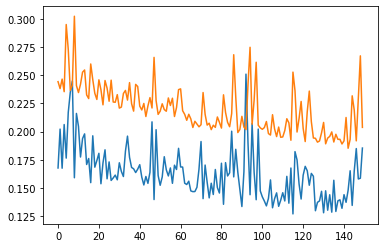

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])